In [5]:
import numpy as np
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
t = [ 0,0,1,0,0,0,0,0,0,0]

In [6]:
def mean_squared_error(y,t):
    return 0.5 * np.sum((y-t)**2)

In [7]:
mean_squared_error(np.array(y),np.array(t))

0.097500000000000031

In [10]:
def cross_entropy_error(y,t):
    delta = 1e-7
    return -np.sum(t * np.log( y + delta))

In [11]:
cross_entropy_error(np.array(y),np.array(t))

0.51082545709933802

In [17]:
import sys, os
sys.path.append(os.pardir)
sys.path.append('/Users/hiroki/program/python/deep_learning_from_scratch/ch03')
import numpy as np
from deep_learning_from_scratch.dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_text) = load_mnist(normalize=True, one_hot_label=True)

print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


In [21]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

print(x_batch.shape)
print(t_batch.shape)

np.random.choice(60000,10)

(10, 784)
(10, 10)


array([44009, 20300, 25280, 36979, 37624, 18790, 25203, 55448, 15210, 25181])

In [35]:
y_np = np.array(y)
t_np = np.array(t)
if y_np.ndim ==1:
    t_np = t_np.reshape(1, t_np.size)
    y_np = y_np.reshape(1,y_np.size)
print(y_np)
print(np.arange(batch_size))
batch_size = y_np.shape[0]
y_np[np.arange(batch_size), t_np]

[[ 0.1   0.05  0.6   0.    0.05  0.1   0.    0.1   0.    0.  ]]
[0]


array([[ 0.1 ,  0.1 ,  0.05,  0.1 ,  0.1 ,  0.1 ,  0.1 ,  0.1 ,  0.1 ,  0.1 ]])

In [36]:
def function_1(x):
    return 0.01 *x**2 + 0.1 *x

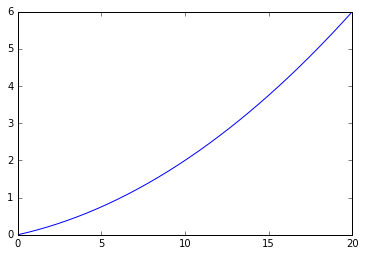

In [38]:
import matplotlib.pylab as plt
%matplotlib inline

x = np.arange(0.0, 20.0,0.1)
y = function_1(x)
plt.plot(x,y)
plt.show()


In [42]:
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        x[idx] = tmp_val -h
        fxh2 = f(x)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val
        
    return grad

In [43]:
def function_2(x):
    return np.sum(x**2)

In [44]:
numerical_gradient(function_2, np.array([3.0,4.0]))

array([ 6.,  8.])

In [50]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    for i in range(step_num):
        grad = numerical_gradient(f,x)
        x -= lr * grad
        
    return x

In [51]:
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=0.1, step_num = 100)

array([ -6.11110793e-10,   8.14814391e-10])